In [63]:
%config InlineBackend.figure_format = 'svg'

In [64]:
%%html
<style>
.output_svg div{
  width: 75% !important;
  height: 75% ;
}
</style>

<AxesSubplot:>

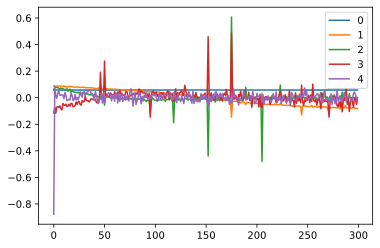

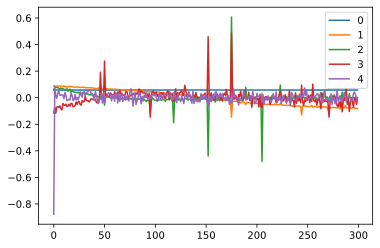

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


df1 = pd.read_csv('../june-18/all_mag_csv/small_nh4no3_1_mag.csv', skiprows = 3,index_col=0)
df2 = pd.read_csv('../june-18/all_mag_csv/small_nano3_2_mag.csv', skiprows = 3,index_col=0)






#df1.loc[len(df1)] = [0, 0.625, 1.25, 2.5, 5, 10];
y1 = pd.Series([0, 0.625, 1.25, 2.5, 5, 10])
#Y = df1.loc[len(df1)-1]; #
X1_ = df1.drop(['freq'], axis = 1)
X1 = X1_.transpose(); # 

pca = PCA()
X1_reduced = pca.fit_transform(scale(X1))

df1_pca = pd.DataFrame(pca.components_.T)
df1_pca.plot()

y2 = pd.Series([0, 0.625, 1.25, 2.5, 5, 10])
#Y = df1.loc[len(df1)-1]; #
X2_ = df2.drop(['freq'], axis = 1)
X2 = X2_.transpose(); # 

pca = PCA()
X2_reduced = pca.fit_transform(scale(X1))

df2_pca = pd.DataFrame(pca.components_.T)
df2_pca.plot()
 


In [107]:
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=2, shuffle = True, random_state = 1)

regr = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

    # Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

ValueError: Found input variables with inconsistent numbers of samples: [5, 6]

In [66]:
# Remove the unused index column
df1.drop(df1.columns[1], axis=1);
df2.drop(df2.columns[1], axis=1);

rename_dict = {}
for i in range(1,len(df1.columns)):
    rename_dict[df1.columns[i]] = '1_'+df1.columns[i];

df1.rename(columns = rename_dict, inplace=True)



      freq      1_0.625       1_1.25        1_2.5        1_5.0       1_10.0  \
0    10000  2350.982215  2239.483985  2218.781997  2212.556138  2212.346202   
1    10300  2346.955881  2234.160347  2213.395332  2207.111288  2206.195217   
2    10600  2347.439143  2235.008865  2214.874736  2208.284236  2207.813718   
3    10900  2347.809693  2235.700565  2215.337206  2209.196001  2208.309460   
4    11200  2346.762359  2235.551472  2215.053864  2208.959540  2208.069215   
..     ...          ...          ...          ...          ...          ...   
295  98500  2324.260647  2263.018520  2259.592895  2258.568741  2258.564209   
296  98800  2324.500052  2263.165490  2259.738973  2259.027576  2258.715448   
297  99100  2324.216494  2262.963550  2259.827544  2259.095923  2258.730305   
298  99400  2324.535564  2263.532165  2260.189015  2259.458005  2259.460688   
299  99700  2325.007927  2263.734476  2260.628880  2259.891340  2259.600941   

           0.625         1.25          2.5         

<AxesSubplot:xlabel='freq'>

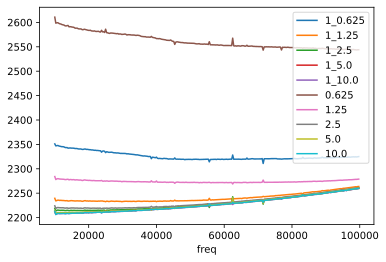

In [68]:

merged = df1.merge(df2, left_on='freq', right_on='freq')
print(merged)
merged.plot(x='freq')